In [1]:
import numpy as np
import matplotlib.pyplot as plt
from python_BP import *
from solvers import *
import equations
import variance_solvers

%matplotlib inline

In [2]:
def convergence(equation, L_x, L_y, delta_n_x=0, delta_n_y=0, type='Dirichlet'):
    E = []
    N = []
    for J in [4, 5, 6, 7]:
        n = 2**(J+delta_n_x) # inner x
        m = 2**(J+delta_n_y) # inner y
        N.append(n)

        A, rhs, exact_sol = equations.construct_matrix(equation, type, L_x, L_y, n, m)
        error = np.linalg.norm(A.dot(exact_sol) - rhs, ord=np.inf)
        E.append(error)
    return E, N

In [17]:
alpha = 10

eq = lambda L_x, L_y: equations.equation_4(L_x, L_y, alpha)

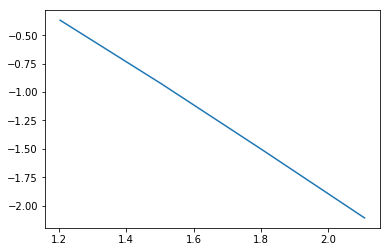

In [4]:
E, N = convergence(eq, 1, 1)
plt.plot(np.log10(N), np.log10(E))

In [18]:
J = 3
h = 1/(1 + 2**J)

A, b, exact = equations.construct_matrix(eq, 'Dirichlet', 1, 1, 2**J, 2**J)
A = A.toarray()

abs_eig = abs(np.linalg.eig(A)[0])
condition_number = np.max(abs_eig)/np.min(abs_eig)

ALPHA = np.logspace(0, 3, 10)
Cond = []
split_N = []
thick_stripes_N = []
stripes_N = []
BP_N = []
BP_N_p = []
for alpha in ALPHA:
    B = A + (np.min(abs_eig) - alpha)*np.eye(2**(2*J))

    abs_eig_B = abs(np.linalg.eig(B)[0])
    condition_number = np.max(abs_eig_B)/np.min(abs_eig_B)
    Cond.append(condition_number)
    
    sol, E = split_BP_solver(B, b, tol=h**2, write=True)
    sol, EE = thick_stripes_BP_solver(B, b, h**2, write=True)
    sol, EEE = stripes_BP_solver(B, b, h**2, write=True)
    sol, EEEE = GaBP(B, b, tol=h**2, write=True)
    sol, EEEEE = GaBP(B, b, tol=h**2, type='Parallel', write=True)

    split_N.append(len(E))
    thick_stripes_N.append(len(EE))
    stripes_N.append(len(EEE))
    BP_N.append(len(EEEE))
    BP_N_p.append(len(EEEEE))

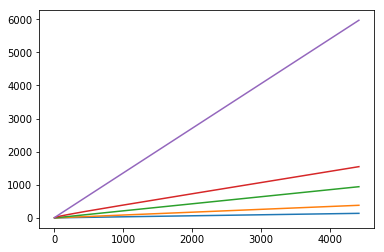

In [19]:
plt.plot(Cond, split_N)
plt.plot(Cond, thick_stripes_N)
plt.plot(Cond, stripes_N)
plt.plot(Cond, BP_N)
plt.plot(Cond, BP_N_p)

In [20]:
AL = []
for a, name in zip([split_N, thick_stripes_N, stripes_N, BP_N, BP_N_p], ['split', 'thick stripes', 'stripes', 'sequential GaBP', 'parallel GaBP']):
    alpha = np.polyfit(Cond, a, deg=1)[0]
    AL.append(alpha)
    print(f'Tangent coefficient for {name} scheme is {alpha:1.4}')

Tangent coefficient for split scheme is 0.0312
Tangent coefficient for thick stripes scheme is 0.08599
Tangent coefficient for stripes scheme is 0.213
Tangent coefficient for sequential GaBP scheme is 0.3473
Tangent coefficient for parallel GaBP scheme is 1.349


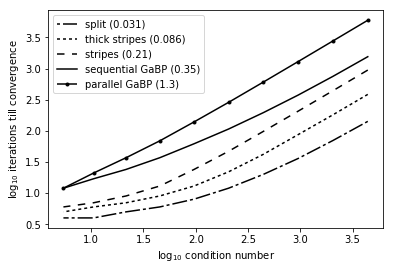

In [27]:
plt.plot(np.log10(Cond), np.log10(split_N), dashes=[2, 2, 10, 2], color='black', label=f'split ({AL[0]:1.2})')
plt.plot(np.log10(Cond), np.log10(thick_stripes_N), dashes=[2, 2, 2, 2], color='black', label=f'thick stripes ({AL[1]:1.2})')
plt.plot(np.log10(Cond), np.log10(stripes_N), color='black', dashes=[5, 5, 5, 5], label=f'stripes ({AL[2]:1.2})')
plt.plot(np.log10(Cond), np.log10(BP_N), color='black', label=f'sequential GaBP ({AL[3]:1.2})')
plt.plot(np.log10(Cond), np.log10(BP_N_p), '.', dashes=[2, 0, 2, 0], color='black', label=f'parallel GaBP ({AL[4]:1.2})')
plt.legend()
#plt.grid(1)
plt.ylabel('$\\log_{10}$ iterations till convergence')
plt.xlabel('$\\log_{10}$ condition number')
plt.savefig('condition_number_Dirichlet.eps', format='eps', pad_inches=0.01)

\begin{equation}
    L_{\text{eq4}}\left(u - \text{exact}_{\text{eq4}}\right) + \beta u = 0
\end{equation}

In [11]:
abs_eig = abs(np.linalg.eig(A)[0])
condition_number = np.max(abs_eig)/np.min(abs_eig)

ALPHA = np.logspace(0, 3, 10)
Cond = []
split_N = []
thick_stripes_N = []
stripes_N = []
BP_N = []
beta = []
for alpha in ALPHA:
    beta.append(np.min(abs_eig) - alpha)
    
    B = A + (np.min(abs_eig) - alpha)*np.eye(2**(2*J))

    abs_eig_B = abs(np.linalg.eig(B)[0])
    condition_number = np.max(abs_eig_B)/np.min(abs_eig_B)
    Cond.append(condition_number)

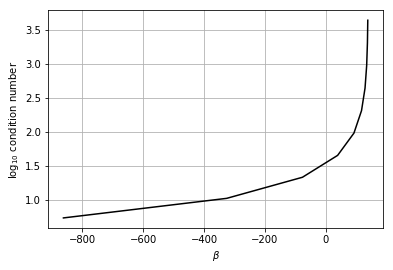

In [23]:
plt.plot(beta, np.log10(Cond), color='black')
plt.xlabel('$\\beta$')
#plt.grid(1)
plt.ylabel('$\\log_{10}$ condition number')
#plt.savefig('condition_number_vs_equation_grid.eps', format='eps', pad_inches=0.01)

**Variance only**

In [35]:
alpha = 10

eq = lambda L_x, L_y: equations.equation_4(L_x, L_y, alpha)

In [36]:
J = 3
h = 1/(1 + 2**J)

A, b, exact = equations.construct_matrix(eq, 'Dirichlet', 1, 1, 2**J, 2**J)
A = A.toarray()

abs_eig = abs(np.linalg.eig(A)[0])
condition_number = np.max(abs_eig)/np.min(abs_eig)

ALPHA = np.logspace(0, 3, 10)
Cond = []
split_N = []
thick_stripes_N = []
stripes_N = []
BP_N = []
BP_N_p = []
for alpha in ALPHA:
    B = A + (np.min(abs_eig) - alpha)*np.eye(2**(2*J))

    abs_eig_B = abs(np.linalg.eig(B)[0])
    condition_number = np.max(abs_eig_B)/np.min(abs_eig_B)
    Cond.append(condition_number)
    
    sol, E = variance_solvers.split_BP_solver(B, b, tol=h**2, write=True)
    sol, EE = variance_solvers.thick_stripes_BP_solver(B, b, h**2, write=True)
    sol, EEE = variance_solvers.stripes_BP_solver(B, b, h**2, write=True)
    sol, EEEE = variance_solvers.GaBP(B, b, tol=h**2, write=True)
    sol, EEEEE = variance_solvers.GaBP(B, b, tol=h**2, type='Parallel', write=True)

    split_N.append(len(E))
    thick_stripes_N.append(len(EE))
    stripes_N.append(len(EEE))
    BP_N.append(len(EEEE))
    BP_N_p.append(len(EEEEE))

In [37]:
AL = []
for a, name in zip([split_N, thick_stripes_N, stripes_N, BP_N, BP_N_p], ['split', 'thick stripes', 'stripes', 'sequential GaBP', 'parallel GaBP']):
    alpha = np.polyfit(Cond, a, deg=1)[0]
    AL.append(alpha)
    print(f'Tangent coefficient for {name} scheme is {alpha:1.4}')

Tangent coefficient for split scheme is -3.559e-19
Tangent coefficient for thick stripes scheme is 8.896e-20
Tangent coefficient for stripes scheme is -3.559e-19
Tangent coefficient for sequential GaBP scheme is 4.448e-20
Tangent coefficient for parallel GaBP scheme is 4.448e-20


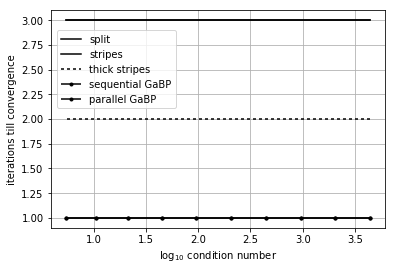

In [45]:
plt.plot(np.log10(Cond), split_N, color='black', label=f'split')
plt.plot(np.log10(Cond), stripes_N, color='black', label=f'stripes')
plt.plot(np.log10(Cond), thick_stripes_N, dashes=[2, 2, 2, 2], color='black', label=f'thick stripes')
plt.plot(np.log10(Cond), BP_N, '.', color='black', dashes=[2, 0, 2, 0], label=f'sequential GaBP')
plt.plot(np.log10(Cond), BP_N_p, '.', dashes=[2, 0, 2, 0], color='black', label=f'parallel GaBP')
plt.legend()
plt.legend(loc = (0.02, 0.55))
plt.grid(1)
plt.ylabel('iterations till convergence')
plt.xlabel('$\\log_{10}$ condition number')
#plt.savefig('condition_number_grid_variance.eps', format='eps', pad_inches=0.01)